# Exercises

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">
    
**EXERCISE 1: Climate Change and Sea Ice Extent**<p>

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements from the [National Snow & Ice Data Center](https://nsidc.org).<p>

We perform the following processing steps:

</li>
<ol>
<ul>
</ul>
<li> We must read and clean the data.
<li> To compute the tendency for a given interval of time (month), we need to normalize the data.
<li> This values can be plotted for the entire time series or for particular months. 
<li> We can compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.
<li> We can also estimate the extent value for 2025.

</ol>
</div>

In [29]:
import numpy as np
import pandas as pd

In [1]:
import os
os.getcwd()

'C:\\Users\\ramya\\OneDrive\\Documents\\GitHub\\lab-dsai-regression-exercises\\your-code'

In [2]:
# Load the data and show the info and contents:
import pandas as pd
ice = pd.read_csv('../data/SeaIce.txt',delim_whitespace=True)
print('shape: {}'.format(ice.shape))
ice.head() 

shape: (424, 6)


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


To compute the anomaly for a given interval of time, we can compute the mean for that interval of time (using the period 1981 through 2010 for the mean extend), before data cleaning.

## Visualization

### The importance of plotting

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties.

<center><img src="./images/Anscombe's_quartet_3.svg"  width="600"></center>

Source [Wikipedia](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).



### Example 1: Housing Data

We'll continue with our Boston housing dataset

In [3]:
from pandas import read_csv
import pandas as pd
import matplotlib.pylab as plt


#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = read_csv('../data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_boston['PRICE'] = df_boston['MEDV']

### Histograms

Text(0, 0.5, 'count')

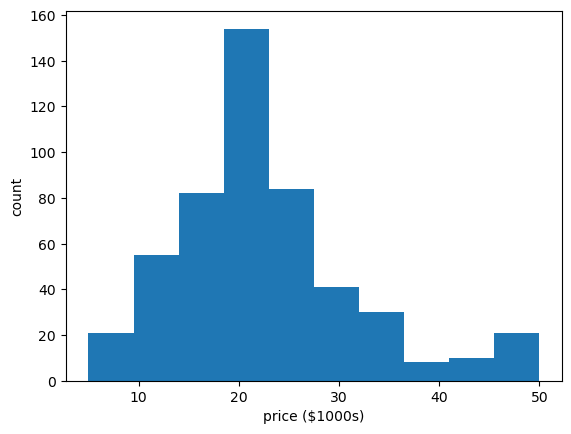

In [4]:
# Histogram of prices:
plt.hist(df_boston.PRICE) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Linear Regression Visualization: Seaborn lmplot

The ``lmplot()`` function from the Seaborn module is intended for exploring linear relationships of different forms in multidimensional datesets. Input data must be in a Pandas ``DataFrame``. To plot, provide the predictor and response variable names along with the dataset

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".
Seaborn visualization can be used to show this linear relationships easily:

We will use the variable price as our response $\textbf{y}$ and LSTAT as our predictor $\textbf{x}$.


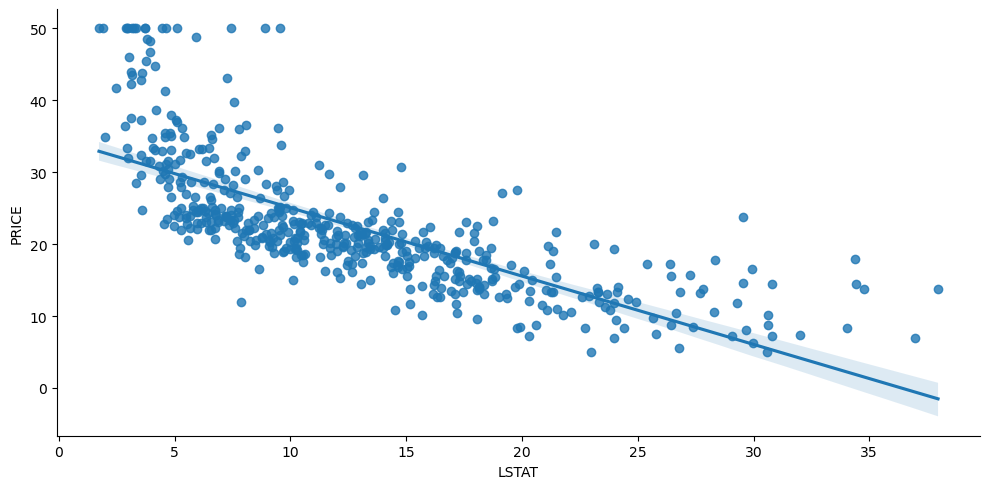

In [5]:
import seaborn as sns
# Visualization of the relations between price and LSTAT
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2);

lmplot has two main components. 

+ The first is a scatterplot, showing the observed datapoints. 
+ The second is a regression line, showing the estimated linear model relating the two variables. Because the regression line is only an estimate, it is plotted with a 95% confidence band to give an impression of the certainty in the model (using Bootstraping).

Is the relationship between the house price and ``lstat`` non-linear? Is the straight line a poor fit? Maybe a better fit can be obtained by including higher order terms:

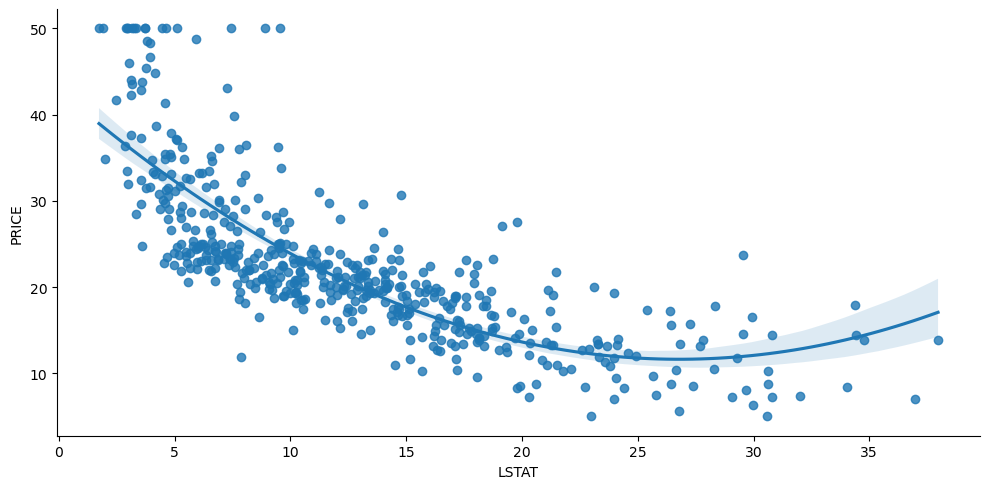

In [6]:
# Estimate a polynomial regression of order 2
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=2);

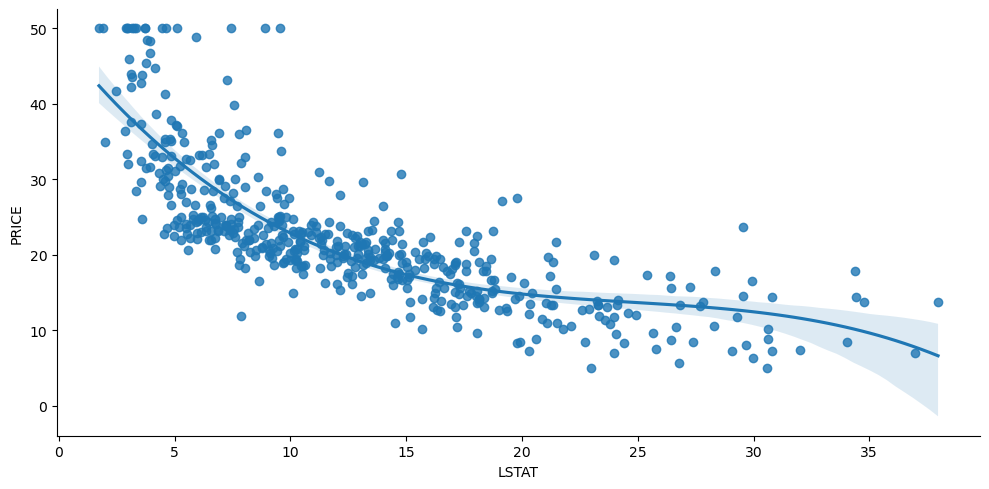

In [7]:
# Estimate a polynomial regression of order 3
sns.lmplot(x="LSTAT", y="PRICE", data=df_boston, aspect=2, order=3);


What if we consider variable RM or AGE?

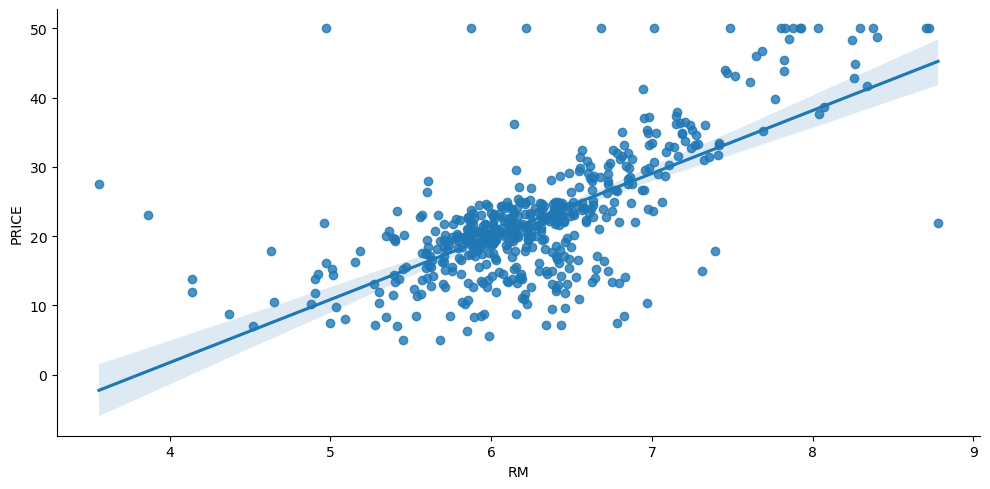

In [8]:
# Visualization of the relations between price and "average number of rooms per dwelling"
sns.lmplot(x="RM", y="PRICE", data=df_boston, aspect=2);

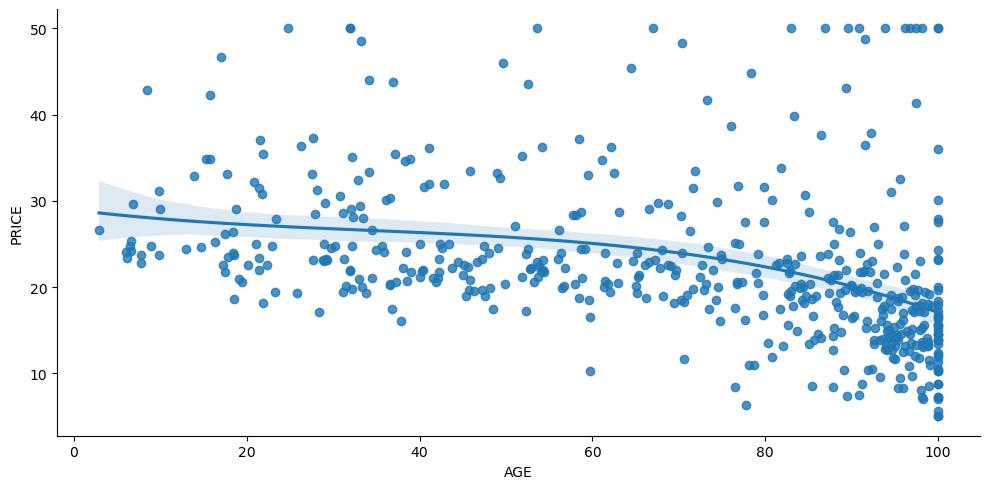

In [9]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

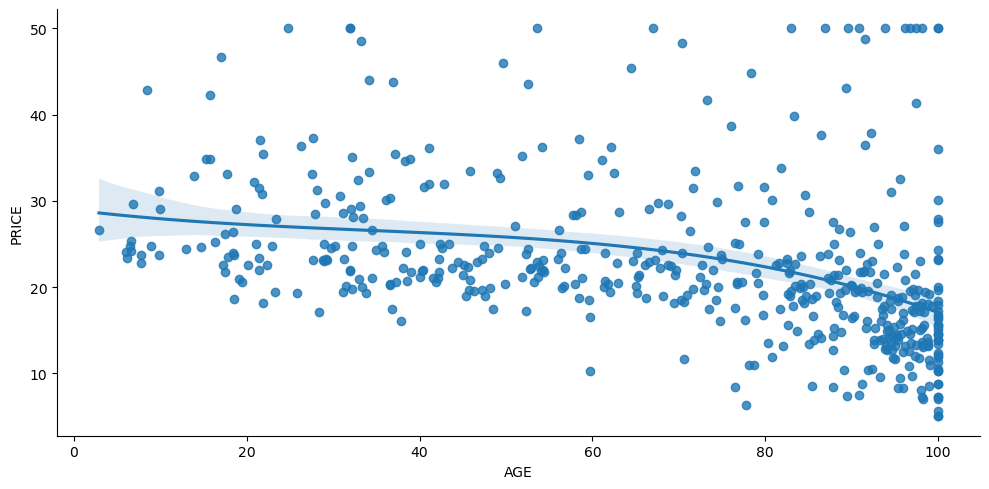

In [10]:
# Visualization of the relations between price and "proportion of owner-occupied units built prior to 1940"
sns.lmplot(x="AGE", y="PRICE", data=df_boston, aspect=2, order=3);

### Heatmap

We can also use corr function from Pandas and heatmap function from Seaborn for studying the variables relationship, plotting a diagonal correlation matrix.

<AxesSubplot:>

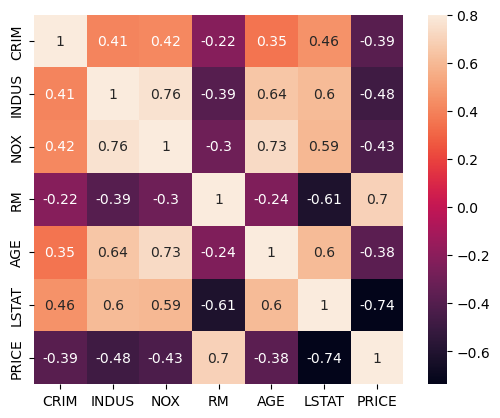

In [11]:
features2 = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'LSTAT', 'PRICE'] # To plot just 7 of the 13 variables: PRICE, LSTAT, AGE, RM, NOX, INDUS, CRIM.
df_boston2 = df_boston[features2]
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

### Scatter plot matrix

Let's explore multiple variables relationships using a scatter plot matrix. The scatter plot is a grid of plots of multiple varaibles one against the other, showing the pairwise relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables:

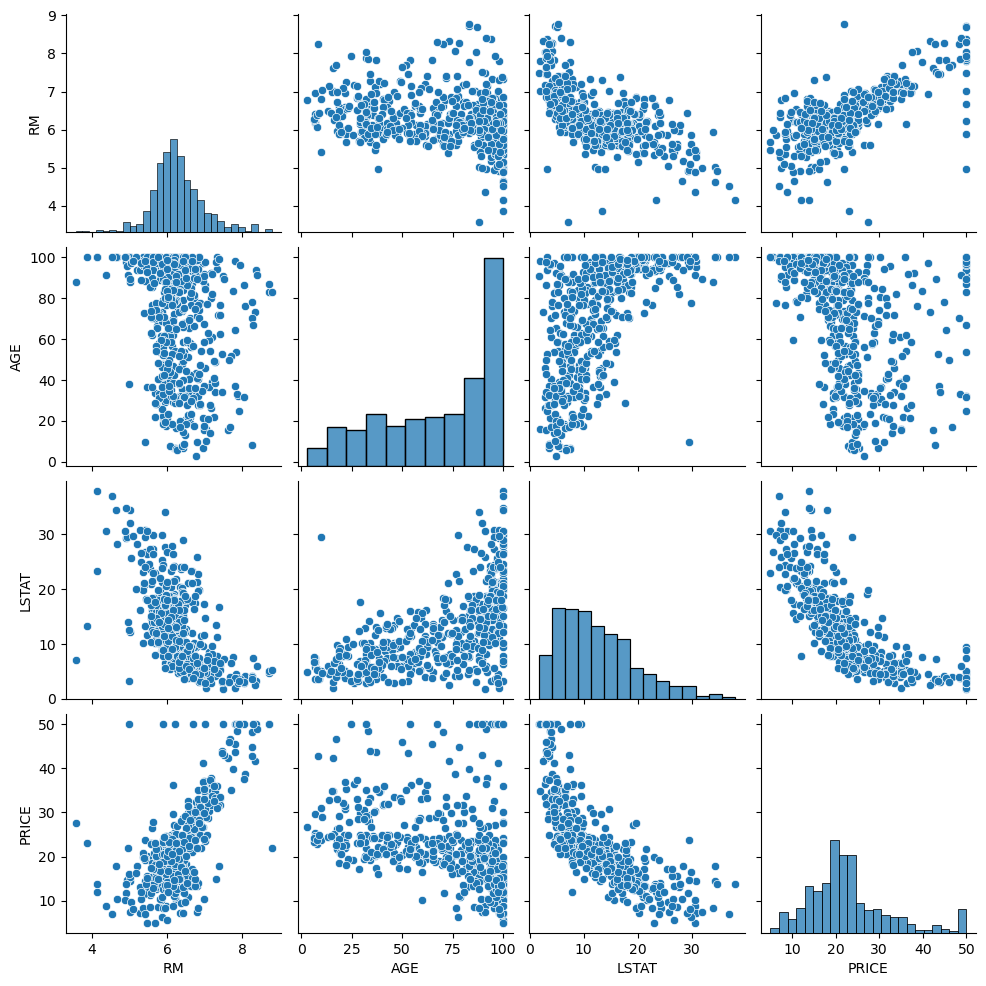

In [12]:
features3 = ['RM','AGE','LSTAT', 'PRICE'] 
df_boston3 = df_boston[features3]
sns.pairplot(df_boston3) # Plot pairwise relationships in the dataset

We can visually analyze the pairwise relationships in the scatter plots. The diagonal axe contains a plot to show the univariate distribution of the data for the variable in that column.

You can create the same scatter plot matrix using the scatter_matrix method in pandas.tools.plotting:

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='AGE', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>,
        <AxesSubplot:xlabel='PRICE', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='AGE'>,
        <AxesSubplot:xlabel='AGE', ylabel='AGE'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='AGE'>,
        <AxesSubplot:xlabel='PRICE', ylabel='AGE'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='AGE', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='PRICE', ylabel='LSTAT'>],
       [<AxesSubplot:xlabel='RM', ylabel='PRICE'>,
        <AxesSubplot:xlabel='AGE', ylabel='PRICE'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>,
        <AxesSubplot:xlabel='PRICE', ylabel='PRICE'>]], dtype=object)

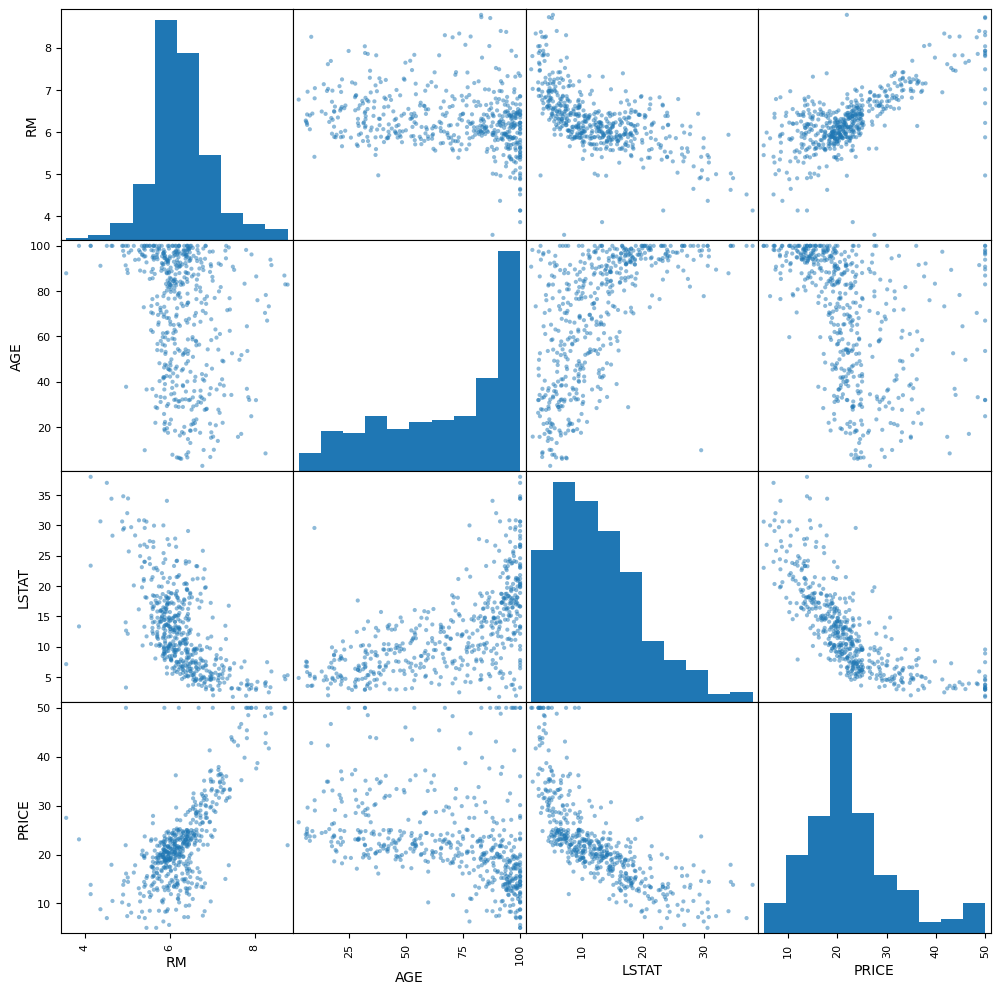

In [13]:
pd.plotting.scatter_matrix(df_boston3, figsize=(12.0,12.0))  

**Plots for the fitting evaluation:**

We can often learn a lot about how well our model did by analyzing the predictions and residuals with two interesting plots: 
- An scatter plot of the observed values $y$ versus the predicted value $\hat y$ 
- An scatter plot residuals $y_i - \hat y_i$ vs. $\hat y_i$.

In both cases we can add a line to show which would be the perfect result. 

Text(0, 0.5, 'Predicted price ($1000s)')

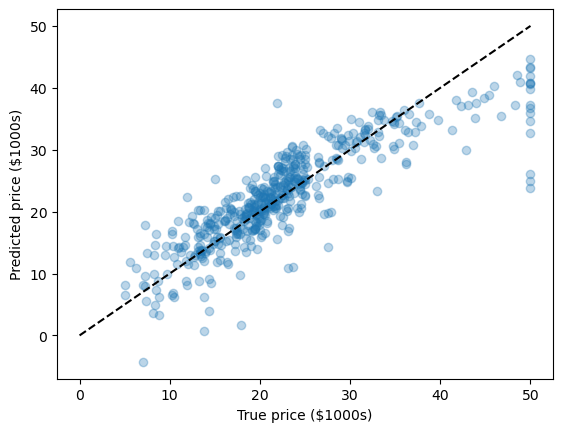

In [14]:
from sklearn.linear_model import LinearRegression

# Assuming your DataFrame is named 'df_boston'
X = df_boston.drop(['PRICE', 'MEDV'], axis=1)  # Select features (all columns except 'PRICE')
y = df_boston['PRICE']  # Target variable

reg = LinearRegression() # Create the Linear Regression estimator
reg.fit(X, y) # Fitting with all the features
y_pred = reg.predict(X) # Perform prediction of all the data

# Visualization of target and predicted responses of the boston data:
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

Text(0, 0.5, '$y - \\hat y$')

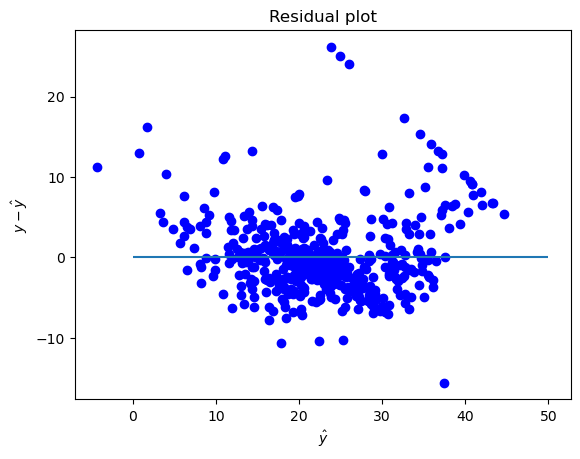

In [15]:
x_plot = plt.scatter(y_pred, (y-y_pred), c='b')
plt.hlines(y=0, xmin= 0, xmax=50)
plt.title('Residual plot')
plt.xlabel('$\hat y$')
plt.ylabel('$y - \hat y$')

Intuitively, if the model is good, then a plot of the residuals ($y_i - \hat y_i$) against the fitted values ($\hat y_i$) should look like noise (i.e., there shouldn't be any visible patterns).

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 2** Diabetes <p>

The diabetes dataset (from scikit-learn) consists of 10 physiological variables (age, sex, weight, blood pressure) measure on 442 patients, and an indication of disease progression after one year.<p>

We will divide in training and testing sets and evaluate the prediction (using sklearn) with a simple and a multiple regression model.<p>

Fill the gaps of the exercise.

</div>

In [17]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X,y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names
print(X.shape, y.shape)
print(feature_names)

(442, 10) (442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [20]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [21]:
features = pd.DataFrame(X, columns = feature_names)
target = pd.DataFrame(y, columns = ["score"])

First visualize the data. Plot a histogram of the target variable.

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

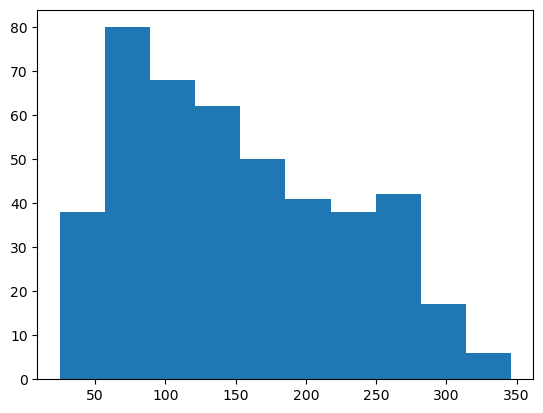

In [23]:
plt.hist(target)

Divide in training and testing sets

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [45]:
X_train = pd.DataFrame(X_train, columns=features.columns)

In [46]:
X_test = pd.DataFrame(X_test, columns=features.columns)

For the simple model, first choose one of the dimensions of the data. Try some plots to identify possible linear relationships between the predictor and target variables. Pick one variable for your first model.

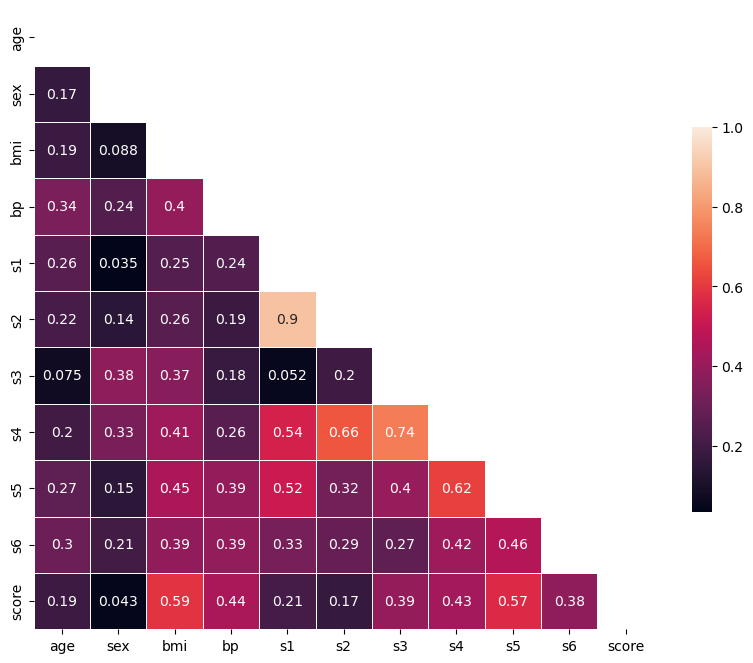

In [30]:
df = pd.concat([features, target], axis=1)

corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
# The bmi variable shows a noticeable linear relationship with diabetes progression.

Visualize the data using scatter plot (plt.scatter):

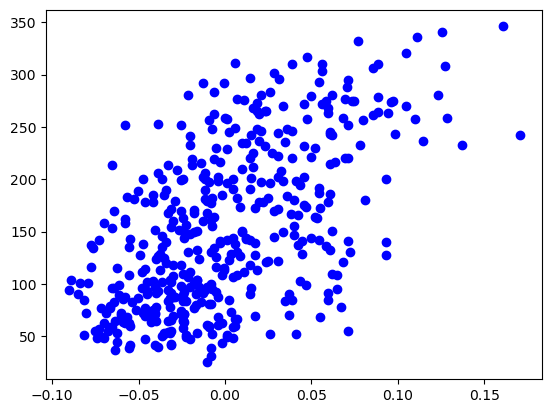

In [31]:
plt.scatter(df['bmi'], df['score'], color='blue')

Visualize the data using scatter plot (plt.scatter) and two different colors for train and test data:

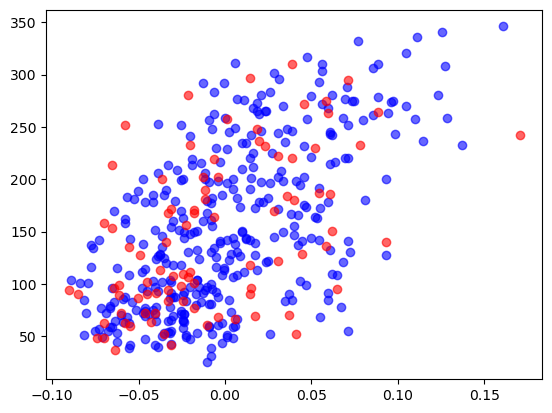

In [32]:
plt.scatter(X_train['bmi'], y_train, color='blue', alpha=0.6, label='Train data')
plt.scatter(X_test['bmi'], y_test, color='red', alpha=0.6, label='Test data')

Train and evaluate the score of the test set.

In [43]:
y_train.shape

(353, 1)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(pd.DataFrame(X_train['bmi']), y_train)

LinearRegression()

Calculate the Mean Squared Error on the train and test set:

In [48]:
mse_train = mean_squared_error(y_train, model.predict(pd.DataFrame(X_train['bmi'])))
mse_test = mean_squared_error(y_test, model.predict(pd.DataFrame(X_test['bmi'])))

In [49]:
print("Simple Linear Regression MSE - Train:", mse_train)
print("Simple Linear Regression MSE - Test:", mse_test)

Simple Linear Regression MSE - Train: 3854.1126520758194
Simple Linear Regression MSE - Test: 4061.825928494928


Visualize the predicted line together with a scatter plot of the training set.

For multiple regression model divide in training and testing sets and evaluate the prediction (sklearn)

In [57]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(features, target, test_size=0.2, random_state=42)
lr_multi = LinearRegression()
lr_multi.fit(X_train_all, y_train_all)

LinearRegression()

Is the score improving using all 10 variables?

In [59]:
mse_train_all = mean_squared_error(y_train_all, lr_multi.predict(X_train_all))
mse_test_all = mean_squared_error(y_test_all, lr_multi.predict(X_test_all))
print("Multiple Linear Regression MSE - Train:", mse_train_all)
print("Multiple Linear Regression MSE - Test:", mse_test_all)

Multiple Linear Regression MSE - Train: 2868.546584216565
Multiple Linear Regression MSE - Test: 2900.1732878832318


<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**Exercice 3: Macroeconomic Dataset**<p>
    
In the following example we will use the Longley dataset of US macroeconomic data from the R datasets website. We want to explore the relationships between the Total Derived Employment ('Employed') and the other variables.

<ul>
<li>Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the population and the Total Derived Employment ('Employed')?</li>
<li>Is there a linear relationship between the armed forces and the unemployed?</li>
<li>Can you see any non-linear effects between the armed forces and the unemployed?</li>
<li>Try to use higher order models to the fitting of GNP with Population.</li>
</ul>
    
</div>

In [60]:
import pandas as pd
# Read data
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
rownames,,,,,,,
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


Is there a linear relationship between the Gross National Product ('GNP') and the Total Derived Employment ('Employed')?

In [61]:
print(df[["GNP", "Employed"]].corr()['Employed'].sort_values(ascending=False))

Employed    1.000000
GNP         0.983552
Name: Employed, dtype: float64


Is there a linear relationship between the population and the Total Derived Employment ('Employed')?

In [62]:
print(df[["Population", "Employed"]].corr()['Employed'].sort_values(ascending=False))

Employed      1.000000
Population    0.960391
Name: Employed, dtype: float64


Is there a linear relationship between the armed forces and the unemployed?

In [64]:
print(df[["Armed.Forces", "Employed"]].corr()['Employed'].sort_values(ascending=False))

Employed        1.000000
Armed.Forces    0.457307
Name: Employed, dtype: float64


Can you see any non-linear effects between the armed forces and the unemployed?

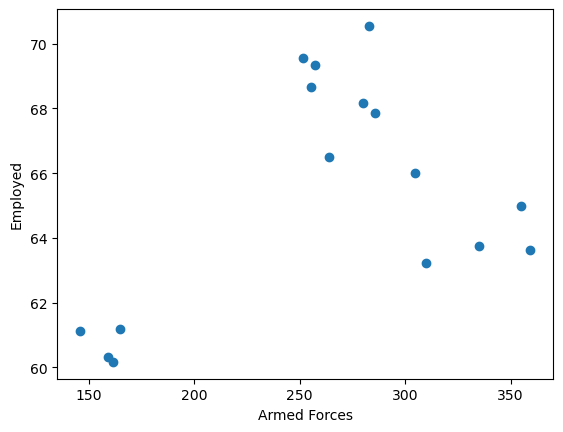

In [66]:
import matplotlib.pyplot as plt

plt.scatter(df['Armed.Forces'], df['Employed'])
plt.xlabel('Armed Forces')
plt.ylabel('Employed')
plt.show()

<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:darkgreen;font-family:Verdana,sans-serif;font-size:16px;">

**EXERCISE 4: Advertising dataset**<p>


In the following example we will use the [advertising dataset](https://www.kaggle.com/purbar/advertising-data/data)which consists of the sales of products and their advertising budget in three different media TV, radio, newspaper.<p>
<ul>
    <li>Is there a linear relationship between the sales of products and the advertising budget in TV, radio or newspapers?</li>
    <li>Train a simple linear model for each variable to predict sales</li>
    <li>Train a multiple linear model to predict sales</li>
    <li>Compare the different models. Which one's performed best?</li>
</ul>

Dataset from the book: "An Introduction to Statistical Learning with Applications in R”. Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani.<p>


</div>